## 데이터 준비

In [1]:
#관련 라이브러리 불러오기
import pandas as pd #판다스
import matplotlib as mpl #맷플롭립
import matplotlib.pylab as plt #맷플롭립
import seaborn as sns #시본
import numpy as np # 넘파이
import plotly.express as px #플로틀리

In [2]:
file_path='data/flights.csv' #data 폴더에 .csv 파일 위치해 있음.
df = pd.read_csv(file_path) #read csv() 함수로 데이터프레임 변환
df

,Unnamed: 0,year,month,passengers
0,0,1949,January,112
1,1,1949,February,118
2,2,1949,March,132
3,3,1949,April,129
4,4,1949,May,121
...,...,...,...,...
139,139,1960,August,606
140,140,1960,September,508
141,141,1960,October,461
142,142,1960,November,390


주어진 데이터는 ****행 ****열로 이루어져 있다.   
데이터의 값들을 살펴보면 ** 는 인덱스 값처럼 사용이 된 것을 볼 수 있다.

## 데이터 보기

In [14]:
df.info() # 데이터프레임의 기본 정보 출력

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1970-01-01 00:00:00.000001949 to 1970-01-01 00:00:00.000001960
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  144 non-null    int64   
 1   year        144 non-null    int64   
 2   month       144 non-null    category
 3   passengers  144 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 5.0 KB


데이터의 **Non-Null Count** 를 보면 데이터의 전체 행이 **행 이기 때문에, ** 의 경우 null값이 있는 데이터를 포함하고 있는 것을 알 수 있다.(=추후 결측 데이터 처리 필요)

In [15]:
df.dtypes #데이터프레임 자료형 확인

Unnamed: 0       int64
year             int64
month         category
passengers       int64
dtype: object

연속형:  
범주형:  
** 는 float64 type이지만 값이 ** 만으로 이루어져 있기 때문에 **범주형**으로 판단하였다.

**데이터프레임 자료형 변환**   
범주형으로 판단된 일부 데이터를 카테고리형으로 자료형을 변환 시키면 용량과 속도 면에서 효율적으로 분석할 수 있다.

In [16]:
#object 타입에서 category 타입으로 변환
df['month'] = df['month'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1970-01-01 00:00:00.000001949 to 1970-01-01 00:00:00.000001960
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  144 non-null    int64   
 1   year        144 non-null    int64   
 2   month       144 non-null    category
 3   passengers  144 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 5.0 KB


#### 시계열 데이터 처리

In [17]:
df['new_year'] = pd.to_datetime(df['year'].dt.year)
df.info()

AttributeError: Can only use .dt accessor with datetimelike values

new_year를 인덱스로 지정

In [13]:
#df.set_index('new_year', inplace=True)
df

,Unnamed: 0,year,month,passengers
new_year,,,,
1970-01-01 00:00:00.000001949,0,1949,January,112
1970-01-01 00:00:00.000001949,1,1949,February,118
1970-01-01 00:00:00.000001949,2,1949,March,132
1970-01-01 00:00:00.000001949,3,1949,April,129
1970-01-01 00:00:00.000001949,4,1949,May,121
...,...,...,...,...
1970-01-01 00:00:00.000001960,139,1960,August,606
1970-01-01 00:00:00.000001960,140,1960,September,508
1970-01-01 00:00:00.000001960,141,1960,October,461


범주형 데이터를 카테고리형으로 변환 후 메모리 사용량은 **KB**로, 변환 전 **KB** 보다 줄어든 것을 확인 할 수 있다.

## 데이터 클린징
**결측 데이터**

In [317]:
df.isnull().sum() #결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          691
Embarked         2
family           0
dtype: int64

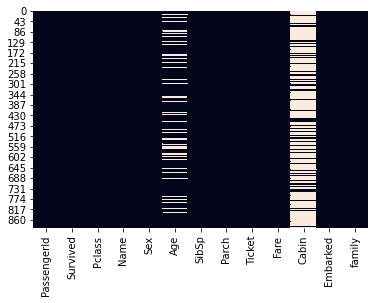

In [318]:
#결측치 시각화
sns.heatmap(df.isnull(), cbar=False) #시본 시각화 확인

** 데이터의 경우 결측치가 너무 많기 때문에 **제거**  
** 데이터는 적은 데이터의 결측치가 있기 때문에 **최다 빈도**의 값으로 **대체**  
** 데이터는 결측치가 많지만 중요하다고 판단하여 데이터를 **중앙값** 으로 **대체**하기로 하였다.

**결측치 제거**

In [319]:
#Cabin 결측 제거
df['Cabin'].value_counts() #Cabin 삭제 전 결측치 내용 확인

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
D19            1
D21            1
D28            1
D30            1
A10            1
Name: Cabin, Length: 147, dtype: int64

In [320]:
df = df.drop(columns='Cabin') #Cabin 열 제거

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  895 non-null    int64   
 1   Survived     895 non-null    int64   
 2   Pclass       895 non-null    int64   
 3   Name         895 non-null    object  
 4   Sex          895 non-null    category
 5   Age          718 non-null    float64 
 6   SibSp        895 non-null    int64   
 7   Parch        895 non-null    int64   
 8   Ticket       895 non-null    object  
 9   Fare         895 non-null    float64 
 10  Embarked     893 non-null    category
 11  family       895 non-null    int64   
dtypes: category(2), float64(2), int64(6), object(2)
memory usage: 72.0+ KB


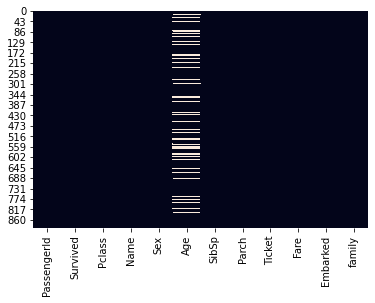

In [321]:
df.info()#결측치 제거 확인
sns.heatmap(df.isnull(),cbar=False)

**결측치 대체**

In [322]:
#Embarked 대체
df['Embarked'].value_counts() #범주형 개수 확인 (최다빈도 값을 찾기 위해서)

S    647
C    168
Q     78
Name: Embarked, dtype: int64

In [323]:
df['Embarked'] = df['Embarked'].fillna('S') #null 값을 최다빈도인 'S'로 대체

In [324]:
#Age 대체
df['Age'] = df['Age'].fillna(df['Age'].mean()) #Age의 평균값으로 대체

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
family         0
dtype: int64

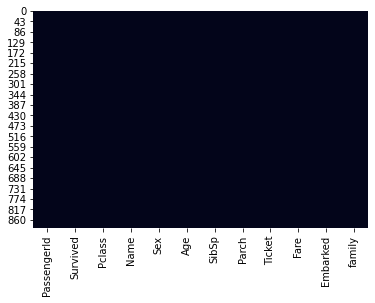

In [325]:
#결측치 처리 최종 확인
sns.heatmap(df.isnull(), cbar=False)
df.isnull().sum()

결측치 처리 최종 확인 결과 더 이상 결측 데이터가 없음을 알 수 있다.

**이상 데이터**

In [326]:
df.describe() #데이터프레임의 기초 통계 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,448.000000,0.383240,2.310615,29.686866,0.526257,0.386592,32.154417,0.912849
std,258.508543,0.486448,0.835221,13.047704,1.106789,0.819395,49.591874,1.625166
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,448.000000,0.000000,3.000000,29.686866,0.000000,0.000000,14.454200,0.000000
75%,671.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,895.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


박스플롯을 통해 이상치 데이터가 존재하는지 확인

In [327]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

#Age box plot
fig.add_trace(
    go.Box(y=df.Age, name="Age"),
    row=1, col=1
)

#Fare box plot
fig.add_trace(
    go.Box(y=df.Fare, name="Fare"),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="box plot")
fig.show()

데이터를 박스플롯으로 확인한 결과 Fare를 살펴보면 유독 하나의 값이 다른 데이터들과 비교되게 큰 값을 가지고 있는 것을 확인 할 수 있다.  
이에 Fare 데이터 에서는 그 값을 제거하고 진행하기로 하였다.  
Fare 제거 기준 : 500 이상  
   
**이상치 제거**

In [328]:
df = df[(df["Fare"] < 500)]

Age의 박스플롯 결과를 보면 일부 데이터가 매우 작은 값을 가지고 있는것을 알 수 있다.  
한두개의 데이터가 아니므로 제거하기보다 Age의 평균 값으로 대체하기로 하였다.  
Age 대체 기준 : 1 미만  
  
**이상치 대체**

In [329]:
#Age가 1 미만인 데이터 리스트
list = df[(df["Age"] < 1)].index
#Age의 mean 값으로 초기화
df.loc[list,"Age"] = df['Age'].mean()

In [330]:
#이상치 처리 최종 확인

fig = make_subplots(rows=1, cols=2)

#Age box plot
fig.add_trace(
    go.Box(y=df.Age, name="Age"),
    row=1, col=1
)

#Fare box plot
fig.add_trace(
    go.Box(y=df.Fare, name="Fare"),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="box plot")
fig.show()

이상치 처리 최종 확인 결과 초기에 설정한 기준에 맞게 데이터들이 수정된 것을 알 수 있다.

**중복 데이터**

In [331]:
#중복 데이터가 있는지 확인
#keep 을 False로 하여 모든 중복 데이터를 출력함
display(df[df.duplicated(['Name','Age'], keep=False)])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S,6
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S,0
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,S,0
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,5
891,892,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S,6
892,893,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S,0
893,894,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,S,0
894,895,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,5


**중복 제거**

In [332]:
#keep을 first로 하여 중복 데이터 중 첫 번째 값을 남김
df = df.drop_duplicates(['Name','Age'],keep='first')

In [333]:
#중복 데이터 처리 최종 확인
display(df[df.duplicated(['Name','Age'], keep=False)])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family


중복 데이터 처리 최종 확인 결과 더 이상 중복 데이터가 없음을 알 수 있다.

## 데이터 탐색

In [334]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.686866,1,2,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0


### 데이터 재구조화
**데이터 구간화**

In [335]:
# 전체를 Age를 기준으로 3개 범주로 구분
df_Age2 = pd.qcut(df["Age"], q=3, labels=["junior","man","senior"])
df["Age_class2"] = df_Age2
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,Age_class2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,junior
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,senior
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,junior
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,senior
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,man
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,junior
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.686866,1,2,W./C. 6607,23.4500,S,3,man
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0,junior


In [336]:
#그룹별로 나이에 대한 통계량 계산
group1 = df.Age.groupby(df.Age_class2)
group1.agg(['count', 'mean', 'std', 'min', 'max'])

,count,mean,std,min,max
Age_class2,,,,,
junior,312,17.737179,7.077987,1.0,26.0
man,293,29.430889,0.882145,27.0,31.0
senior,283,43.812721,9.901210,32.0,80.0


Age를 동일 개수로 나눈 3개의 그룹별 통계량을 확인해보면  
1번 그룹은 **평균 **  
2번 그룹은 **평균 **  
3번 그룹은 **평균 **  
의 값을 가지고 있는 것을 확인 할 수 있다.

그룹별로 나이가 어떻게 분포되어있는지 알기 위해서 **시각화**를 이용해 보기로 하였다.  
그룹은 범주형이고 나이는 연속형이기 때문에 **범주형**과 **연속형**을 함께 표현할 수 있는 ```swarmplot```을 사용하기로 하였다.  
```swarmplot```은 데이터를 나타내는 점이 겹치지 않도록 옆으로 이동하여 표현하기 때문에 데이터의 분포를 효과적으로 파악할 수 있다.

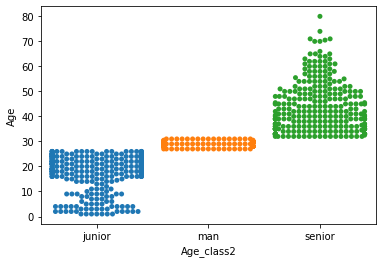

In [337]:
sns.swarmplot(x='Age_class2', y='Age', data=df)

**피봇 테이블**

In [338]:
df.pivot_table(index='Sex', columns='Pclass', values='Survived') #Sex 변수를 행 데이터로 피봇+69

Pclass,1,2,3
Sex,,,
female,0.967742,0.921053,0.500000
male,0.358333,0.157407,0.135447


피봇 테이블을 확인해보면 보편적으로  
따라서  
   
위 피봇 테이블의 값은 아래처럼 **시각화**를 통해서 한눈에 보이게 만들 수 있다.

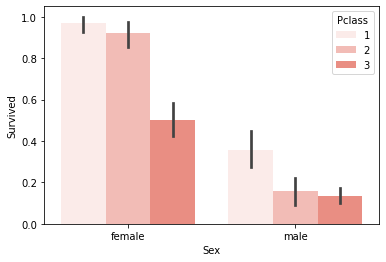

In [339]:
#성별에 대한 Pclass당 생존율을 쉽게 보기 위하여 시본으로 시각화
sns.barplot(x="Sex", y="Survived", hue="Pclass", color="salmon", data=df)

### 데이터 그룹 분석

In [340]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,Age_class2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,junior
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,senior
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,junior
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,senior
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,man
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,junior
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.686866,1,2,W./C. 6607,23.4500,S,3,man
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0,junior


데이터를 확인해보니 ****에 대한 ****를 통해서 평균적으로 **사람들이 얼마정도에 표를 샀는지** 알고 싶어졌다.  
이를 ```groupby```를 통해 알아보고자 한다.  

In [341]:
df1 = df['Fare'].groupby(df['Pclass'])

In [342]:
#좌석등급별 요금 평균
df['Fare'].groupby(df['Pclass']).mean()

Pclass
1    78.124061
2    20.662183
3    13.675550
Name: Fare, dtype: float64

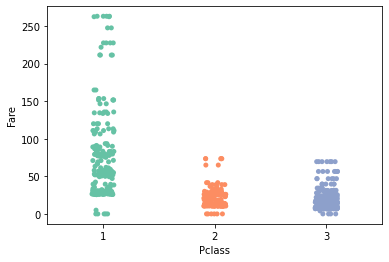

In [343]:
sns.stripplot(x='Pclass', y='Fare', data=df, palette="Set2")

좌석등급별 요금의 분포를 ```stripplot```으로 확인한 결과 2,3등급 좌석에 비해 1등급 좌석의 가격이 통일되지 않고 보다 다양하게 나타나는 것을 알 수 있었다.

In [344]:
#좌석등급 빈도 파악
df['Fare'].groupby(df['Pclass']).count()

Pclass
1    213
2    184
3    491
Name: Fare, dtype: int64

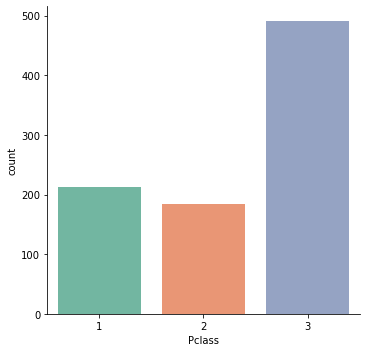

In [345]:
sns.catplot('Pclass', kind='count', data=df, palette="Set2")

좌석등급별 빈도를 알기 위해서 ```catplot```의 ```count```를 사용하였다.   
위를 통해서 ~를 알 수 있다.   
또한 ****에 대한 ****를 통해서 **살아남은 사람들은 평균적으로 몇살**인지 알아내기로 하였다.

In [346]:
#생존율별 나이 평균
df['Age'].groupby(df['Survived']).mean()

Survived
0    30.412310
1    29.085228
Name: Age, dtype: float64

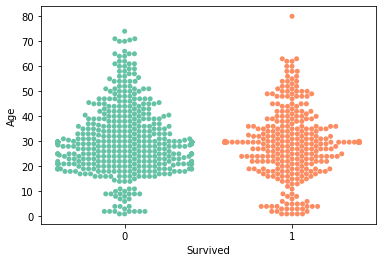

In [347]:
sns.swarmplot(x='Survived', y='Age', data=df, palette="Set2")

In [348]:
#생존율 빈도 파악
df['Age'].groupby(df['Survived']).count()

Survived
0    549
1    339
Name: Age, dtype: int64

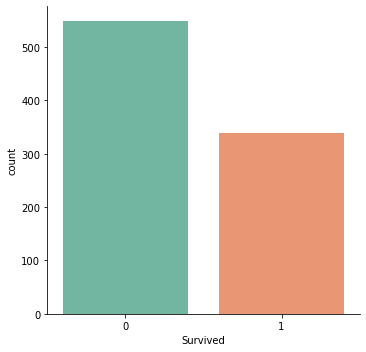

In [349]:
sns.catplot('Survived', kind='count', data=df, palette="Set2")

위를 통해서 ~를 알 수 있다.

### 다변량 시각화로 데이터 탐색

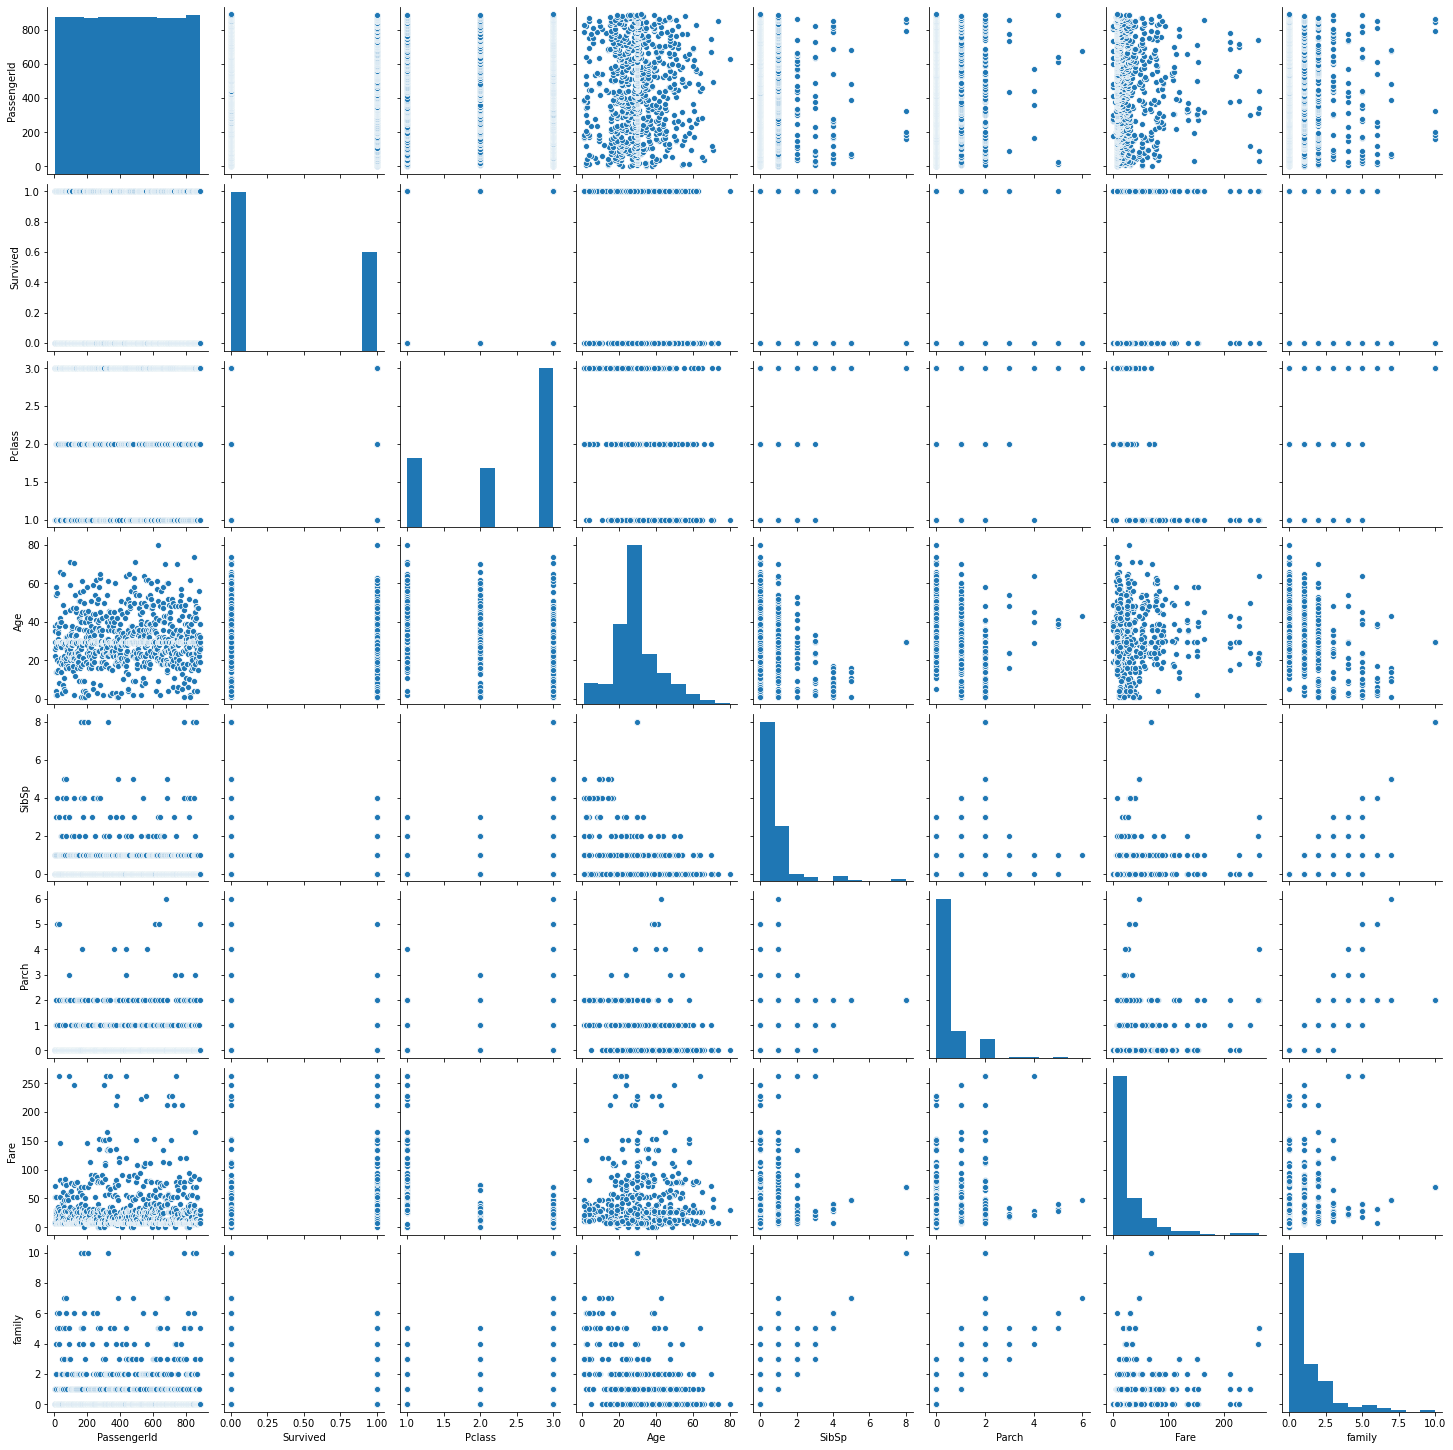

In [350]:
sns.pairplot(df)

In [29]:
df.sort_values(by=['Fare', 'Pclass'], axis=0, ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S


In [17]:
df.sort_values(by=['Fare'], axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

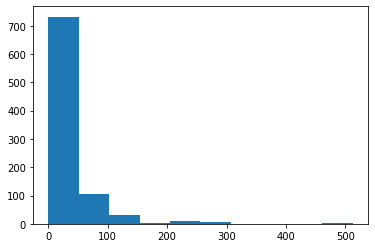

In [47]:
plt.hist(df.Fare)

In [96]:
x = df['Fare'].value_counts()
x[0]

15

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

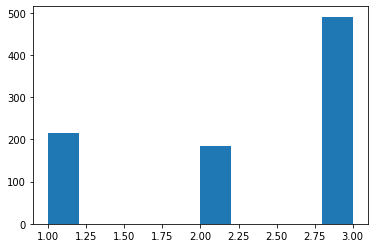

In [45]:
plt.hist(df['Pclass'])

C:\Users\dahyun\Anaconda3\envs\test\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\dahyun\Anaconda3\envs\test\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


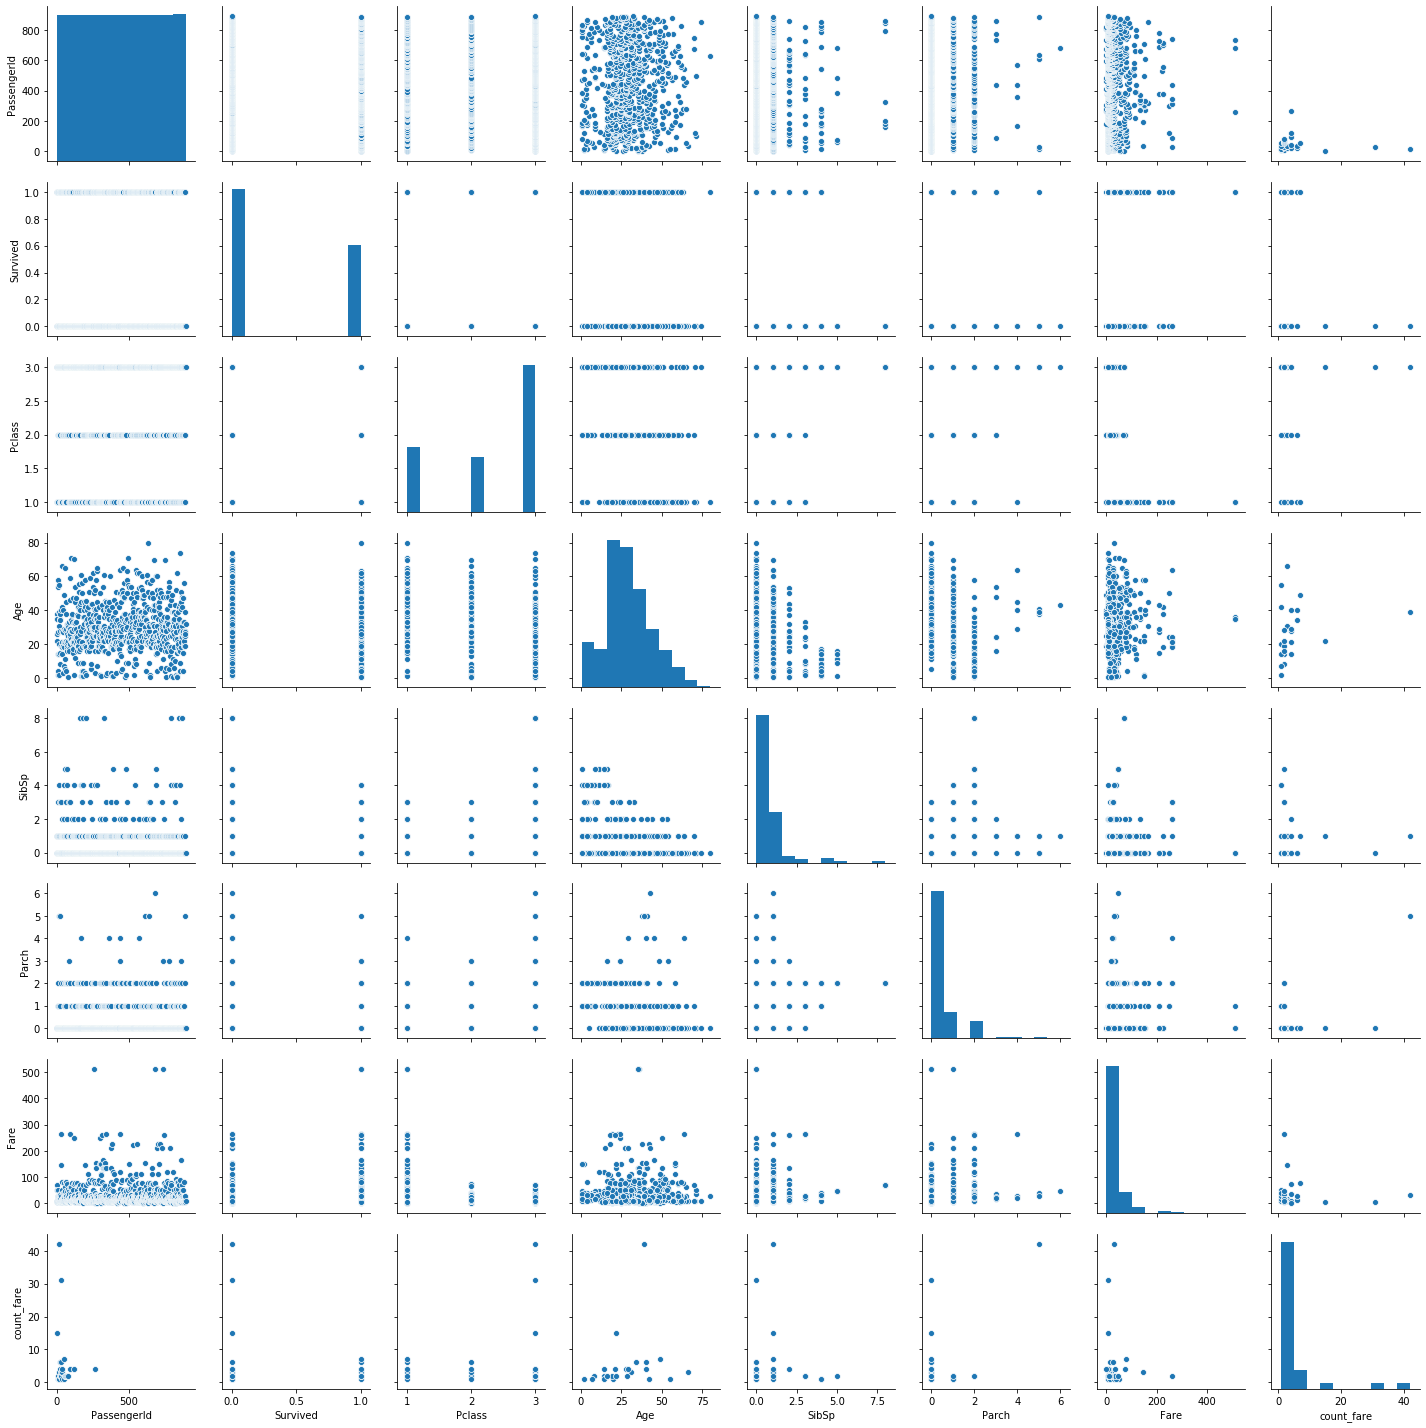

In [97]:
sns.pairplot(df)

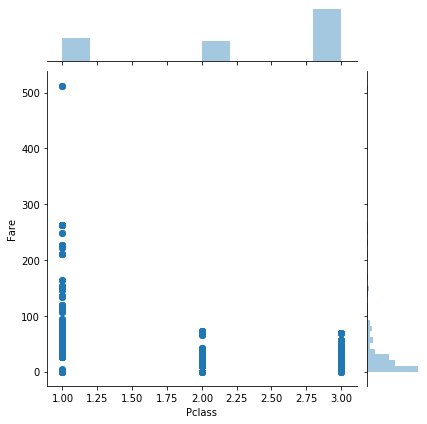

In [99]:
sns.jointplot(x="Pclass", y = "Fare", data=df)

In [ ]:
#df.drop([''], axis=1) #inplace=True
#df

In [108]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,15.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,NaN


In [110]:
x = df[['Pclass', 'Fare']]
y = x.groupby('Pclass')

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

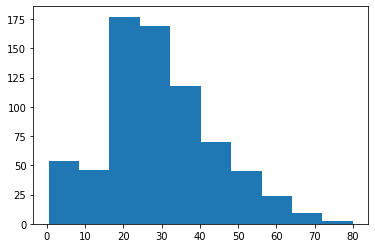

In [118]:
plt.hist(df['Age'])

In [58]:
df1 = df
df1['Pclass'] = df['Pclass'].astype('object')

In [60]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4000000000000004, 2.6, 2.8,
        3.0], dtype=object),
 <a list of 10 Patch objects>)

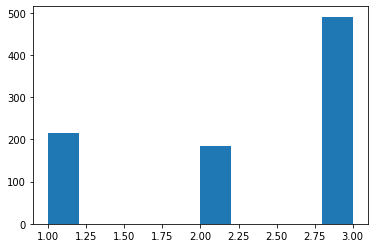

In [63]:
plt.hist(df1['Pclass'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
df['new_Pclass'] = pd.to_object(df['Pclass'])

AttributeError: module 'pandas' has no attribute 'to_object'

{'whiskers': [<matplotlib.lines.Line2D at 0x226377595c8>,
 'caps': [<matplotlib.lines.Line2D at 0x22637759f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x22637751d88>],
 'medians': [<matplotlib.lines.Line2D at 0x22637761bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x22637761fc8>],
 'means': []}

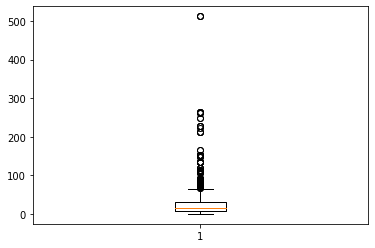

In [36]:
plt.boxplot(df['Fare'])

In [126]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
count_fare     float64
dtype: object

In [138]:
pd.pivot_table(df, index='Pclass', columns='Survived', values='Fare')

Survived,0,1
Pclass,,
1,64.684008,95.608029
2,19.412328,22.055700
3,13.669364,13.694887


In [ ]:
#데이터 백업하기
data_copy = df.copy()
df.to_csv('data/example_copy.csv')